In [ ]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score  
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import f1_score, matthews_corrcoef 
from sklearn.metrics import confusion_matrix 
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from imblearn.over_sampling import SMOTE

In [ ]:
#Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Load the dataset
train_transaction = pd.read_csv("/content/drive/MyDrive/Datasets/machine_learning_india_ai_challenge-dataset/TRAIN.csv")
train_transaction.head()

,Index,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,2.245295,-1.160960,-1.966682,-1.430190,-0.607246,-1.508696,-0.074415,-0.655096,-1.970141,1.607283,-0.780267,-0.294928,1.236719,-0.135565,-0.832677,-1.400205,0.807960,-0.670317,-0.044106,-0.292081,0.010490,0.521714,-0.064971,0.048849,0.383290,0.103970,-0.047350,-0.064800,74.75,0
1,1,1.278609,0.102574,0.512079,0.003930,-0.723474,-1.334105,0.029958,-0.296595,0.128119,-0.209865,0.188511,0.674525,0.712608,0.122319,1.038024,0.128638,-0.222614,-0.687546,-0.056504,-0.040015,-0.081470,-0.182506,0.078986,0.789993,0.219794,0.938359,-0.078720,0.008119,1.38,0
2,2,1.466457,0.026088,-0.499298,-0.674372,-0.144883,-1.178075,0.058089,-0.420145,-1.359651,0.210249,-0.033777,-0.001594,1.767471,-1.212943,0.427684,1.252714,0.843412,-1.534474,0.830734,0.207653,-0.234087,-0.710542,-0.001242,-0.174713,0.533719,-0.454779,0.001524,0.030935,10.95,0
3,3,-0.922137,-0.371579,2.132018,-0.796997,0.324175,-1.162006,0.277208,-0.249586,-0.775648,-0.061757,-0.959725,0.408746,0.597641,-0.802430,-1.889520,-1.607785,-0.401475,0.729773,-2.445693,-0.461062,-0.302654,-0.246899,-0.045745,0.677110,0.016109,-0.734220,-0.034480,-0.064786,8.04,0
4,4,-1.166525,0.255439,2.108464,0.135019,-0.072979,0.910821,0.755918,0.355528,-0.422820,-0.842826,0.663538,0.624657,0.107262,-0.073654,-0.305506,0.618642,-0.952529,0.757618,-0.375461,0.353355,0.136470,0.017496,0.121017,0.636266,0.492943,-0.750242,0.029124,0.091303,175.00,0


In [ ]:
#Total Columns in dataset
train_transaction.columns

Index(['Index', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
train_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284455 entries, 0 to 284454
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Index   284455 non-null  int64  
 1   V1      284455 non-null  float64
 2   V2      284455 non-null  float64
 3   V3      284455 non-null  float64
 4   V4      284455 non-null  float64
 5   V5      284455 non-null  float64
 6   V6      284455 non-null  float64
 7   V7      284455 non-null  float64
 8   V8      284455 non-null  float64
 9   V9      284455 non-null  float64
 10  V10     284455 non-null  float64
 11  V11     284455 non-null  float64
 12  V12     284455 non-null  float64
 13  V13     284455 non-null  float64
 14  V14     284455 non-null  float64
 15  V15     284455 non-null  float64
 16  V16     284455 non-null  float64
 17  V17     284455 non-null  float64
 18  V18     284455 non-null  float64
 19  V19     284455 non-null  float64
 20  V20     284455 non-null  float64
 21  V21     28

In [ ]:
#Missing data percenatge list if any
for col in train_transaction.columns:
    pct_missing = np.mean(train_transaction[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Index - 0%
V1 - 0%
V2 - 0%
V3 - 0%
V4 - 0%
V5 - 0%
V6 - 0%
V7 - 0%
V8 - 0%
V9 - 0%
V10 - 0%
V11 - 0%
V12 - 0%
V13 - 0%
V14 - 0%
V15 - 0%
V16 - 0%
V17 - 0%
V18 - 0%
V19 - 0%
V20 - 0%
V21 - 0%
V22 - 0%
V23 - 0%
V24 - 0%
V25 - 0%
V26 - 0%
V27 - 0%
V28 - 0%
Amount - 0%
Class - 0%


In [ ]:
#Total no. of values in each class
label_1,label_0 = train_transaction["Class"].value_counts()
print("Class 1:\t"+str(label_1),"\nClass 0:\t"+str(label_0))
print("Label 1 class Percentage(%): "+str((label_1*100)/train_transaction["Class"].count()))
print("Label 0 class Percentage(%): "+str((label_0*100)/train_transaction["Class"].count()))

Class 1:	284015 
Class 0:	440
Label 1 class Percentage(%): 99.84531824014343
Label 0 class Percentage(%): 0.15468175985656782


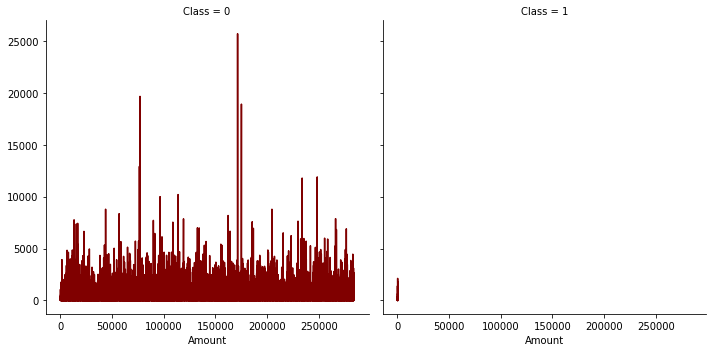

In [ ]:
#Visulatization of label 0 and label 1 with respect to 'Amount'.
fn = sns.FacetGrid(train_transaction, col = 'Class', height=5)
fn = fn.map(plt.plot,'Amount',color = 'maroon')

In [ ]:
X = train_transaction.drop(["Class"], axis = 1) 
Y = train_transaction["Class"] 

In [ ]:
#Train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 55 , stratify = Y)

In [ ]:
print("Train Feature set:\t"+str(len(X_train)))
print("Train Label Feature set:\t"+str(len(Y_train)))
print("Test Feature set:\t"+str(len(X_test)))
print("Test label set:\t"+str(len(Y_test)))

Train Feature set:	213341
Train Label Feature set:	213341
Test Feature set:	71114
Test label set:	71114


In [ ]:
#Stratified Sampling
print("For Training Data :")
print(Y_train.value_counts())
label_1,label_0 = Y_train.value_counts()
print("Label 1 class Percentage: "+str((label_1*100)/Y_train.count()))
print("Label 0 class Percentage: "+str((label_0*100)/Y_train.count()))
print("\nFor Test Set :")
print(Y_test.value_counts())
lbl_1,lbl_0 = Y_test.value_counts()
print("Label 1 class Percentage: "+str((label_1*100)/Y_test.count()))
print("Label 0 class Percentage: "+str((label_0*100)/Y_test.count()))

For Training Data :
0    213011
1       330
Name: Class, dtype: int64
Label 1 class Percentage: 99.84531805888226
Label 0 class Percentage: 0.15468194111774108

For Test Set :
0    71004
1      110
Name: Class, dtype: int64
Label 1 class Percentage: 299.5345501588998
Label 0 class Percentage: 0.4640436482267908


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy: 0.9993109654920269


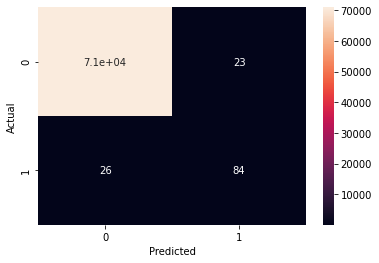

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71004
           1       0.79      0.76      0.77       110

    accuracy                           1.00     71114
   macro avg       0.89      0.88      0.89     71114
weighted avg       1.00      1.00      1.00     71114



In [ ]:
#Classification using Logistic Regression
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train,Y_train)
Y_pred=logistic_regression.predict(X_test)
confusion_matrix=pd.crosstab(Y_test,Y_pred,rownames=['Actual'],colnames=['Predicted'])
sns.heatmap(confusion_matrix,annot=True)
print('Accuracy:',metrics.accuracy_score(Y_test,Y_pred))
plt.show()
print(classification_report(Y_test, Y_pred)) 

Accuracy: 0.9996203279241781


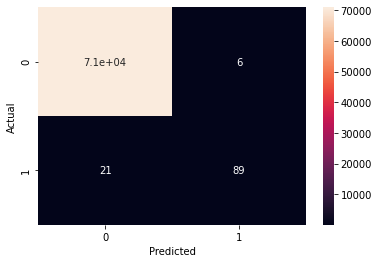

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71004
           1       0.79      0.76      0.77       110

    accuracy                           1.00     71114
   macro avg       0.89      0.88      0.89     71114
weighted avg       1.00      1.00      1.00     71114



In [ ]:
#Classification using RandomForest Classifier
Randomforest = RandomForestClassifier()
Randomforest.fit(X_train,Y_train)
Y_pred_rf=Randomforest.predict(X_test)
confusion_matrix_rf=pd.crosstab(Y_test,Y_pred_rf,rownames=['Actual'],colnames=['Predicted'])
sns.heatmap(confusion_matrix_rf,annot=True)
print('Accuracy:',metrics.accuracy_score(Y_test,Y_pred_rf))
plt.show()
print(classification_report(Y_test, Y_pred)) 

Accuracy: 0.9992547177770903


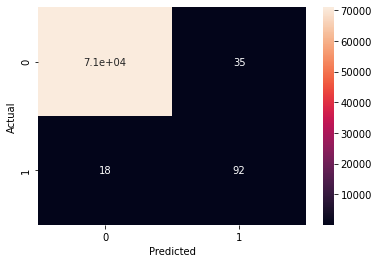

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71004
           1       0.79      0.76      0.77       110

    accuracy                           1.00     71114
   macro avg       0.89      0.88      0.89     71114
weighted avg       1.00      1.00      1.00     71114



In [ ]:
#Classification using DecisionTree Classifier
dt = DecisionTreeClassifier()
dt.fit(X_train,Y_train)
Y_pred_dt=dt.predict(X_test)
confusion_matrix_dt=pd.crosstab(Y_test,Y_pred_dt,rownames=['Actual'],colnames=['Predicted'])
sns.heatmap(confusion_matrix_dt,annot=True)
print('Accuracy:',metrics.accuracy_score(Y_test,Y_pred_dt))
plt.show()
print(classification_report(Y_test, Y_pred)) 

In [ ]:
#Resampling of data as data was imbalanced.
print("Label 1 before Resampling,: ", sum(Y_train == 1)) 
print("Label 0 before Resampling: ", sum(Y_train == 0)) 

sm = SMOTE(random_state = 3) 
X_train_sm, Y_train_sm = sm.fit_sample(X_train, Y_train.ravel()) 
  
print('Shape of train_X after Resampling : ', X_train_sm.shape) 
print('Shape of train_Y after Reampling,: \n', Y_train_sm.shape) 
  
print("Label 1 after Resampling,: ", sum(Y_train_sm == 1)) 
print("Label 0 after Resampling: ", sum(Y_train_sm == 0)) 

Label 1 before Resampling,:  330
Label 0 before Resampling: 
 213011


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Shape of train_X after Resampling :  (426022, 30)
Shape of train_Y after Reampling,: 
 (426022,)
Label 1 after Resampling,:  213011
Label 0 after Resampling: 
 213011


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy: 0.9777962145287847


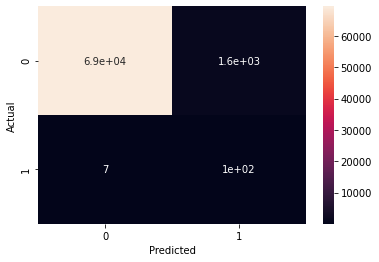

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71004
           1       0.06      0.94      0.12       110

    accuracy                           0.98     71114
   macro avg       0.53      0.96      0.55     71114
weighted avg       1.00      0.98      0.99     71114



In [ ]:
#Classification using Logistic Regression after Resampling
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_sm,Y_train_sm)
pred_lr_sm = logistic_regression.predict(X_test)
confusionmat_lr_sm = pd.crosstab(Y_test,pred_lr_sm,rownames=['Actual'],colnames=['Predicted'])
sns.heatmap(confusionmat_lr_sm, annot=True)
print('Accuracy:',metrics.accuracy_score(Y_test,pred_lr_sm))
plt.show()
print(classification_report(Y_test, pred_lr_sm)) 

Accuracy: 0.9996062659954439


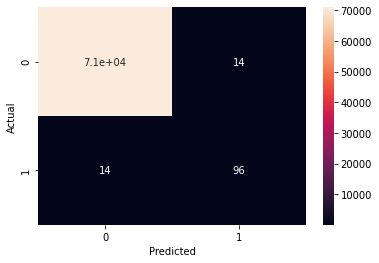

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71004
           1       0.87      0.87      0.87       110

    accuracy                           1.00     71114
   macro avg       0.94      0.94      0.94     71114
weighted avg       1.00      1.00      1.00     71114



In [ ]:
#Classification using RandomForest Classifier after Resampling
Randomforest = RandomForestClassifier()
Randomforest.fit(X_train_sm,Y_train_sm)
pred_rf_sm = Randomforest.predict(X_test)
confusionmat_rf_sm = pd.crosstab(Y_test,pred_rf_sm,rownames=['Actual'],colnames=['Predicted'])
sns.heatmap(confusionmat_rf_sm,annot=True)
print('Accuracy:',metrics.accuracy_score(Y_test, pred_rf_sm))
plt.show()
print(classification_report(Y_test, pred_rf_sm))

Accuracy: 0.9979891441910173


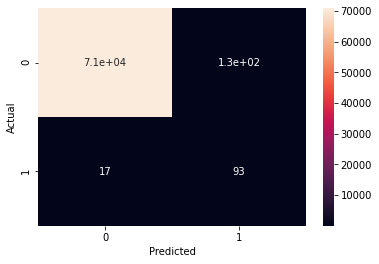

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71004
           1       0.42      0.85      0.57       110

    accuracy                           1.00     71114
   macro avg       0.71      0.92      0.78     71114
weighted avg       1.00      1.00      1.00     71114



In [ ]:
#Classification using DecisionTree Classifier after Resampling
dt = DecisionTreeClassifier()
dt.fit(X_train_sm,Y_train_sm)
pred_dt_sm = dt.predict(X_test)
confusionmat_dt_sm = pd.crosstab(Y_test,pred_dt_sm,rownames=['Actual'],colnames=['Predicted'])
sns.heatmap(confusionmat_dt_sm,annot=True)
print('Accuracy:',metrics.accuracy_score(Y_test, pred_dt_sm))
plt.show()
print(classification_report(Y_test, pred_dt_sm)) 

In [ ]:
#load test data
test_df = pd.read_csv("/content/drive/MyDrive/Datasets/machine_learning_india_ai_challenge-dataset/TEST.csv")

In [ ]:
fraud_detect = Randomforest.predict(test_df)
fraud_prediction = pd.DataFrame(data=fraud_detect, columns=["Class"])
fraud_prediction.head()

,Class
0,0
1,0
2,0
3,1
4,0


In [ ]:
test_df_index = test_df[["Index"]].copy()
test_df_index.head()

,Index
0,0
1,1
2,2
3,3
4,4


In [ ]:
final_prediction_df = pd.concat([test_df_index, fraud_prediction], axis=1, sort=True)
final_prediction_df.head()

,Index,Class
0,0,0
1,1,0
2,2,0
3,3,1
4,4,0


In [ ]:
final_prediction_df.to_csv('/content/fraudelent_prediction_model.csv', index=False)